### NLP Fall-23 Final Project
Members:
1. Divya Sharma (ds655)
2. Revanth Chowdary Ganga (rg361)
3. Udyan Sachdev (us26)

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
#Configuring Settings
pd.set_option("mode.copy_on_write", True)
pd.set_option("display.max_colwidth",200)

In [3]:
# Downloading the datasets
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Importing the dataset
df = pd.read_csv("../../01_Data/01_Raw/raw_tweets.csv")
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
2931,3002,3,0,3,0,1,@DON_Le3GGG lol hell ya dey think a nicca down der #roadrunnin
3841,3951,3,0,3,0,1,@King_4_Murphy pussy
5211,5366,3,1,0,2,2,@Yaremisxo whatever Neymar trash
9261,9517,3,0,3,0,1,Fuck ms. Patrick that bitch can't teach for shit
17945,18347,3,0,1,2,2,"RT @UnusualFactPage: Shy people tend have great observational skills, making it easier to recognize the core of a problem then solving it."


In [5]:
# Dropping the columns that are not needed
df = df[["class", "tweet"]]
df.sample(5)

,class,tweet
1668,1,"&#8220;@__nijel: This hoe Mimi said ""I hurt my hand"" &#128529;&#8221;&#128514;&#128514;&#128514; bitch her throat &#128514;&#128514;"
23483,1,Young bitches talk about their new man ALLLL DAY....as if anyone is really intrested in that shit lol
15681,0,"RT @ItsSonGoku: When niggas ask me ""Where the hoes at?"" http://t.co/eg6gxgGzFC"
17597,1,RT @TexasHickspanic: Hey you!! Acting like a saint on twitter.. we think you're fucking weird you prude bitch.
15811,1,"RT @JimNorton: And for the record, I think Dan Snyder is a cunt. The hypocrisy of the NFL is just embarrassing at this point."


In [6]:
#get rows which have https in tweet
df.loc[df["tweet"].str.contains("https", na=False)].sample(5)

,class,tweet
20286,1,"RT @vickstar_isabel: ""@kyleighhmariee: &#8220;@TezCapone: My type a bitch &#128525;&#128525;&#128553; https://t.co/Bz4yBovcfl&#8221;""\n\nLmao yass"
14038,1,RT @510988: Ugliest bitches I've ever seen &#128514; https://t.co/JLeYDCegf0
14460,1,RT @BrandonBangerz: &#8220;@mostafa092: &amp; you guys thought sharkiesha and shovel girl were crazy.. she snapped this bitches nose. https://t.co/5&#8230;
16775,1,RT @OfficialKingDre: bitch you guessed it https://t.co/DCsu5vQbpl
10738,1,I love you my nigguh but your a grown ass man https://t.co/utZj6I5Uhj


In [7]:
df.iloc[12955, :]

class                                                                                                                                             1
tweet    My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
Name: 12955, dtype: object

# Data Cleaning Process Starts Here

In [8]:
# create helper colums for cleaning
df["clean_tweet"] = df["tweet"].astype(str)

In [9]:
# Convert all the text to lower case
df["clean_tweet"] = df["clean_tweet"].str.lower()

In [10]:
# removing URLS
def remove_URL(text):
    text = re.sub(r"http\S+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(remove_URL)

In [11]:
# removing mentions
def remove_mentions(text):
    return re.sub(r"@\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_mentions)

In [12]:
# removing hashtags
def remove_hashtags(text):
    return re.sub(r"#\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_hashtags)

In [13]:
# removing special characters and numbers
spl_chrs = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"


def remove_spl_chrs(text):
    text = "".join([_ for _ in text if _ not in spl_chrs])
    text = re.sub("[0-9]+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(lambda x: remove_spl_chrs(x))

In [14]:
# removing stopwords
stop = stopwords.words("english")
df["clean_tweet"] = df["clean_tweet"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

In [15]:
# removing retweet
def remove_rt(text):
    return re.sub("^[rt]+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_rt)

In [16]:
df["tokenized"] = df["clean_tweet"].apply(word_tokenize)

In [17]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
11171,1,I'll fuck a bitch real quick,ill fuck bitch real quick,"[ill, fuck, bitch, real, quick]"
21329,2,Thank you Charlie #FF @Charlie4927 @StacyDmomof5 @PattiSM74 @RevkahJC @cantUCIMblonde @Kacado,hank charlie,"[hank, charlie]"
10771,1,I need a Belgian waffle and a couple bad bitches,need belgian waffle couple bad bitches,"[need, belgian, waffle, couple, bad, bitches]"
17741,1,RT @TheVoiceOfMiami: When you start liking a hoe you don't really like because she gives you the pussy on a consistent basis...,start liking hoe dont really like gives pussy consistent basis,"[start, liking, hoe, dont, really, like, gives, pussy, consistent, basis]"
21383,1,That bitch.,bitch,[bitch]


In [18]:
#Confirm if HTTPs are removed
df.iloc[12955,:]

class                                                                                                                                                   1
tweet          My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
clean_tweet                                                                baby lexy whole aint shit bitch winter sorry ass rwd thats flaw still love tho
tokenized                                                  [baby, lexy, whole, aint, shit, bitch, winter, sorry, ass, rwd, thats, flaw, still, love, tho]
Name: 12955, dtype: object

# Data Stemming and Lematization

In [19]:
# Stemming
ps = nltk.PorterStemmer()


def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: stemming(x))

In [20]:
# Lemmatization
wn = nltk.WordNetLemmatizer()


def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: lemmatizer(x))

In [21]:
# regenrate the clean tweet
def regen_tweet(text):
    return " ".join(text)
df["clean_tweet"] = df["tokenized"].apply(lambda x: regen_tweet(x))

In [22]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
13903,1,Pretend assholes callin the women bitches when they know they love em lol..,pretend asshol callin woman bitch know love em lol,"[pretend, asshol, callin, woman, bitch, know, love, em, lol]"
11907,0,It stinks in here must be then pussy ass niggas talkin shit #tomyfacebro test me,stink must pussi as nigga talkin shit test,"[stink, must, pussi, as, nigga, talkin, shit, test]"
9244,1,Fuck bitches get money,fuck bitch get money,"[fuck, bitch, get, money]"
13052,1,My homeboy got a hoe number on house arrest ... i said that's good she won't ask to go anywhere,homeboy got hoe number hous arrest said that good wont ask go anywher,"[homeboy, got, hoe, number, hous, arrest, said, that, good, wont, ask, go, anywher]"
4338,0,@Ole_Boy @m10eezy yes I'm white washed because I don't go around repping my hood and saying a bunch of ignorant nig terms.,ye im white wash dont go around rep hood say bunch ignor nig term,"[ye, im, white, wash, dont, go, around, rep, hood, say, bunch, ignor, nig, term]"


# Data Selection

In [23]:
# Dropping category 0 from the dataset since it has low values as seen in the EDA
df = df[df["class"] != 0]

In [24]:
df["Length"] = df["tokenized"].apply(len)

In [25]:
# Dropping tweets with 0 length
df = df[df["Length"] != 0]

In [26]:
# Generating simple label for easy identification
df["offensive"] = df["class"].apply(lambda x: "Yes" if x == 1 else "No")

In [27]:
df.sample(5)

,class,tweet,clean_tweet,tokenized,Length,offensive
16528,1,RT @MrPerfect_22: Most of these niggas go broke for these hoes !!,nigga go broke hoe,"[nigga, go, broke, hoe]",4,Yes
3345,2,@HarleyyyQuinn_ trash,ash,[ash],1,No
8943,2,Embrace it. Love it. Flip this group of mine runoff water colored turds off and make a pick.,embrac love flip group mine runoff water color turd make pick,"[embrac, love, flip, group, mine, runoff, water, color, turd, make, pick]",11,No
10964,2,I think about the fact that dinosaurs evolved into birds every time I eat chicken. Dinosaurs are delicious.,hink fact dinosaur evolv bird everi time eat chicken dinosaur delici,"[hink, fact, dinosaur, evolv, bird, everi, time, eat, chicken, dinosaur, delici]",11,No
23292,1,You don't HAVE to say it. You showed yaself. RT @UptownRaised: Bitch nobody said I did now shut the fuck up that fat made you retarded @VofD,dont say show yaself rt bitch nobodi said shut fuck fat made retard,"[dont, say, show, yaself, rt, bitch, nobodi, said, shut, fuck, fat, made, retard]",13,Yes


In [28]:
# dropping extra columns
df2 = df[["offensive", "class", "tokenized", "clean_tweet"]]

In [29]:
# View Distribution of the classes
df2["offensive"].value_counts()

offensive
Yes    19181
No      4156
Name: count, dtype: int64

In [30]:
# create a new random sample with 4000 rows from each class
df3 = (
    df2.groupby("offensive")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

In [31]:
df3["offensive"].value_counts()

offensive
No     4000
Yes    4000
Name: count, dtype: int64

In [32]:
df3.sample(5)

,offensive,class,tokenized,clean_tweet
7020,Yes,1,"[alway, bro, nigga, get, crazi, weather, rt, weather, trash, odbut, gon, get, c]",alway bro nigga get crazi weather rt weather trash odbut gon get c
43,No,2,"[bird, bug, anat, r, via]",bird bug anat r via
2413,No,2,"[flappi, bird, bull]",flappi bird bull
2840,No,2,"[douch, cub, redneck, cub, fan, freak, ask, bite, bloodi, berk, he, like]",douch cub redneck cub fan freak ask bite bloodi berk he like
613,No,2,"[wo, road, diverg, yellow, wood, chose, one, jtunheimr, robert, frost, giant]",wo road diverg yellow wood chose one jtunheimr robert frost giant


In [33]:
# Replacing the class labels 2 with 0 for easy use in models
df3["class"] = df3["class"].replace(2, 0)

In [34]:
#confirm the mapping
df3[['class','offensive']].value_counts().reset_index()

,class,offensive,count
0,0,No,4000
1,1,Yes,4000


In [35]:
# Splitting the dataset into train and test sets at 80:20 ratio
train, test = train_test_split(
    df3, test_size=0.20, stratify=df3["offensive"], random_state=42
)

In [36]:
train["offensive"].value_counts()

offensive
Yes    3200
No     3200
Name: count, dtype: int64

In [37]:
test["offensive"].value_counts()

offensive
Yes    800
No     800
Name: count, dtype: int64

In [38]:
# Saving the datasets
train.to_csv("../../01_Data/02_Processed/train.csv", index=False)
test.to_csv("../../01_Data/02_Processed/test.csv", index=False)

# EDA Plots

In [39]:
df2.sample(5)

,offensive,class,tokenized,clean_tweet
5626,No,2,"[long, name, chang, al, memorabilia, wredskin, name, deem, racist, therbi, illeg]",long name chang al memorabilia wredskin name deem racist therbi illeg
24705,Yes,1,"[hink, ol, nigga, wit, money, dont, even, care, swag, rockin, sandal, wit, velcor, strap, aint, checkin, bitch]",hink ol nigga wit money dont even care swag rockin sandal wit velcor strap aint checkin bitch
12827,No,2,"[memori, weekend, earli, bird, wine, walk, price, still, avail, particip, locat]",memori weekend earli bird wine walk price still avail particip locat
23641,Yes,1,"[bitch, that, yo, nigga, well, aint, bitch]",bitch that yo nigga well aint bitch
1257,Yes,1,"[bitch, look, first, day, school]",bitch look first day school


## Length Distributions

In [40]:
#Avregae length of tweets by category
len_no = df[df["offensive"] == "No"]["Length"].mean()
len_yes= df[df["offensive"] == "Yes"]["Length"].mean()

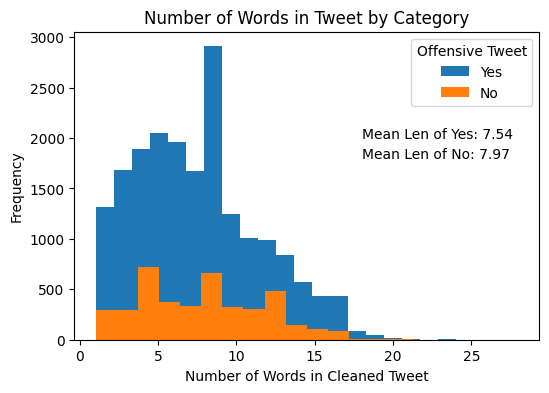

In [41]:
#plotting distrubution of words by category
plt.figure(figsize=(6, 4))
plt.hist(df[df["offensive"] == "Yes"]["Length"], bins=20, label="Yes")
plt.hist(df[df["offensive"] == "No"]["Length"], bins=20, label="No")
plt.title("Number of Words in Tweet by Category")
plt.xlabel("Number of Words in Cleaned Tweet")
plt.ylabel("Frequency")
plt.legend(title="Offensive Tweet")
plt.text(18, 2000, f"Mean Len of Yes: {len_yes:.2f}")
plt.text(18, 1800, f"Mean Len of No: {len_no:.2f}")

#saving the plot
plt.savefig("../../03_Plots/01_EDA/01_Len.png", dpi=300, bbox_inches="tight")

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

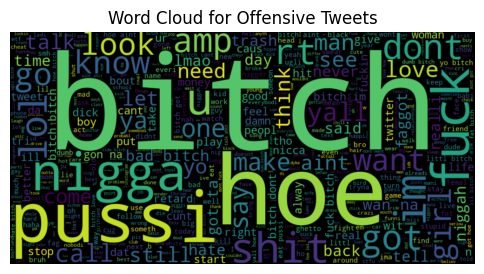

In [42]:
#Word cloud for offensive tweets
plt.figure(figsize=(6,4))
yes_words=' '.join(df2[df2['offensive']=="Yes"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
yes_words=WC.generate(yes_words)
plt.imshow(yes_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA/02_WC-yes.png',dpi=300,bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

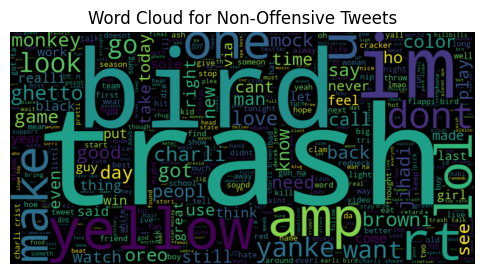

In [43]:
#Word cloud for non-offensive tweets
plt.figure(figsize=(6,4))
no_words=' '.join(df2[df2['offensive']=="No"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
no_words=WC.generate(no_words)
plt.imshow(no_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA/03_WC-no.png', dpi=300, bbox_inches='tight')
plt.show

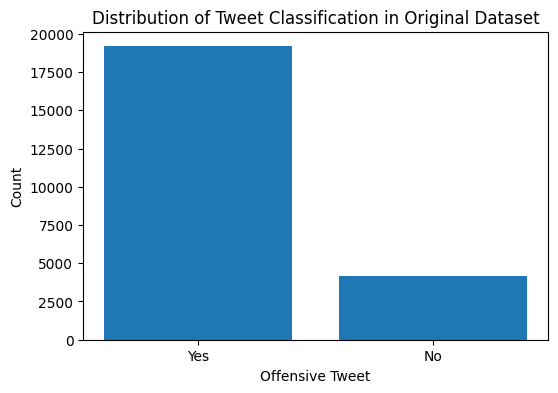

In [44]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df2['offensive'].value_counts().index,df2['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Original Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])
plt.savefig('../../03_Plots/01_EDA/04_orginalClass.png', dpi=300, bbox_inches='tight')
plt.show()

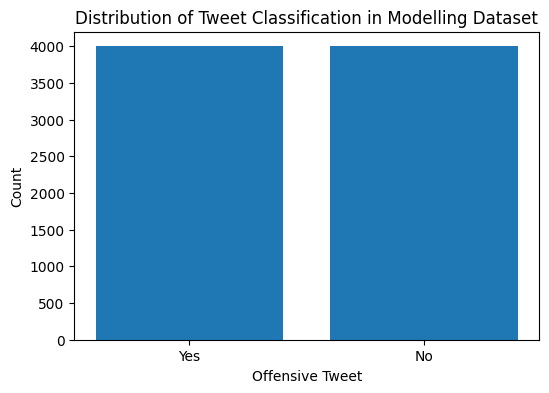

In [45]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df3['offensive'].value_counts().index,df3['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Modelling Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['Yes','No'])
plt.savefig('../../03_Plots/01_EDA/05_modelClass.png', dpi=300, bbox_inches='tight')
plt.show()